# Introduction to Plotting with Seaborn

Much of today's lecture will be taken from the really wonderful [tutorial on Seaborn](https://seaborn.pydata.org/tutorial).

We'll start by loading the libraries we'll need. These four libraries are the Fab Four of data science.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks") # There are a few options for the style for seaborn: 
# white, dark, whitegrid, darkgrid, ticks

Seaborn includes a few datasets. We're going to start with the `iris` dataset. This is sort of like the "hello, world" of datasets for visualization and data science. Let's load it and see what it looks like.

In [2]:
iris = sns.load_dataset("iris")

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


As you can see, it's a Pandas data frame of 150 observations about flowers.

## Univariate and bivariate relationships

One of the first things we want to do is look at the distributions of data and the relationships between them. Here are a few common approaches.

### Displot

This is the workhorse for univariate distributions.

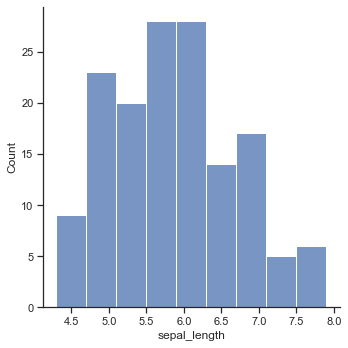

In [4]:
sns.displot(iris.sepal_length); # The semicolon at the end suppresses the matplotlib output

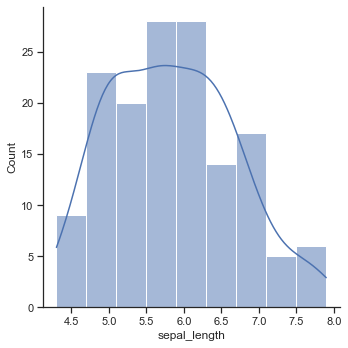

In [5]:
# There are some additional options for this plot, e.g.
sns.displot(iris.sepal_length, kde=True);

In [ ]:
sns.displot(iris.sepal_length, kind='ecdf');

### Exercise 1

Visualize the distribution of another variable in the iris dataset

In [ ]:
## your code here

### Scatterplots

Here, the cool default plot is called `jointplot`

In [ ]:
sns.jointplot(x='sepal_length',
              y='petal_length', 
              data=iris);

Again, the default looks nice but there are additional options.

In [ ]:
sns.jointplot(x='sepal_length',
              y='petal_length',
              kind = 'hex',
              data=iris);

There's also an option for a plain scatterplot

In [ ]:
sns.scatterplot(x='sepal_length',
              y='petal_length',
              data=iris);

The other really cool visualization is the `pairplot`, which shows histograms and bivariate relationships between all variables.

In [ ]:
sns.pairplot(iris);

You may also want to visualize the relationship between variables. This draws a regression line with error bars.

In [ ]:
sns.lmplot(x='sepal_length',
              y='petal_length',
              data=iris);

You can make this a polynomial by adding an `order` parameter or make it non-parametric with a LOESS by setting `lowess = True`

In [ ]:
sns.lmplot(x='sepal_length',
              y='petal_length',
              order = 2,
              data=iris);

## Bivariate categorical data

There are other tools for plotting categorical data. [This page](https://seaborn.pydata.org/tutorial/categorical.html) shows a whole bunch, but here are some of my favorites.

### Swarm plots


In [ ]:
sns.swarmplot(y='petal_length', x= 'species', data = iris);

In [ ]:
sns.boxplot(y='petal_length', x= 'species', data = iris);

In [ ]:
sns.boxenplot(y='petal_length', x= 'species', data = iris);

In [ ]:
sns.barplot(y='petal_length', x= 'species', data = iris);

## Getting crazy - facets and hues and multiple comparisons

For this next bit, we're going to load another dataset with some additional categorical variables.

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips

This is a dataset of tip size with information about the tipper. I'm going to show a few ways of visualizing this, and then give some exercises for visualizations for you to create.

This one shows the relationship of the bill to the tip, but colored by the sex of the tipper.

In [ ]:
sns.lmplot(x="total_bill",
           y="tip", 
           hue = 'time',
           data=tips);

And now, we get even crazier, by using facets - these are multiple plots in the same figure which show different subsets of the data.

In [ ]:
sns.lmplot(x="total_bill",
           y="tip", 
           hue = 'sex',
           col = 'smoker',
           data=tips);

## Making things prettier

Seaborn has lots of nice defaults, but you will often want to do things like add a title, change the axis labels, or change the color palette. Here are a few examples.

### Palettes

Seaborn has many, many palettes. [This page](https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f) shows a bunch of them, many of which are great. Here's how you use the "viridis" palette.

In [ ]:
sns.lmplot(x="total_bill",
           y="tip", 
           hue = 'sex',
           col = 'smoker',
           data=tips,
           palette = 'viridis'
          );

### Adding axis labels and titles

Changing labels and titles is a bit of a pain - you have to save the plot (as `ax` by convention), and then modify the saved object.

In [ ]:
ax = sns.lmplot(x="total_bill",
           y="tip", 
           hue = 'sex',
           col = 'smoker',
           data=tips,
           palette = 'viridis'
          );

# This sets the x and y axis labels
ax.set(xlabel = 'Bill Amount', ylabel = 'Tip Amount');

# For the title, we have to do this ugly code
ax.fig.subplots_adjust(top=0.85); # This moves the plot down below the title
ax.fig.suptitle('Tip amount by smoker status'); # And this adds the title

## Matplotlib

One final note is that `seaborn` is built on top of `matplotlib` and is designed to make plotting easier. Once in a while, you may find that there's something you can't do easily in `seaborn` and you need to use `matplotlib` directly. It's beyond the scope of this class, but [here are some examples of cool plots using matplotlib](https://matplotlib.org/3.2.1/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py).

## Exercises

### Exercise 2

Plot a boxplot of the tip size by the size of the party.

### Exercise 3

Take your code from Exercise 2, and color the boxplots by the gender of the tipper.

### Exercise 4

Plot a swarm plot of the bill amount by the size of the party.

### Exercise 5

Now take your swarm plot and make a facet for each day of the week.

Hint: In order to use facets, you need to use one of the higher-level functions - `relplot()`, `displot()`, or `catplot()`.

Bonus: See if you can figure out how to wrap the facets into a 2x2 grid

### Exercise 6

Come up with your own question about this dataset. Then, create a visualization that sheds light on that question and make an argument about how it helps to answer the question.

### Exercise 7

Load the `diamonds` dataset from `sns` and do the same thing: come up with a question about it and create a visualization that helps to answer it.